<h1 style="font-family:cursive; font-size:18px;background-color: #70dbdb;color:black;text-align:center;padding: 8px">Loan Eligibility Prediction</h1>

<h1 style="font-family:cursive; font-size:14px;color:#008080;text-align:left;padding: 4px">10. Feature Engineering</h1>

<h1 style="font-family:cursive; font-size:10px;color:#008080;text-align:left;padding: 4px">1. Credit Score</h1>

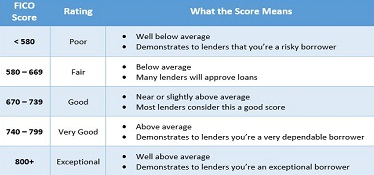

In [48]:
def credit_bucket(x):
    if  x < 580:
        return 'Poor'
    elif 580 <= x < 669:
        return 'Fair'
    elif 669 <= x < 739:
        return 'Good'
    elif  739 <= x < 799:
        return 'Very Good'
    else:
        return 'Exceptional'
train_new['Cred_Segment'] = train_new['Credit Score'].apply(credit_bucket)

In [49]:
colors = ['gold', 'mediumturquoise']
x=train_new['Cred_Segment'].value_counts()
x=pd.DataFrame(x).reset_index()
x=x.rename(columns={'index':'Rating','Cred_Segment':'Count'})
import plotly.express as px
fig = go.Figure(data=[go.Pie(labels=x['Rating'],values=x['Count'],hole=0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='<b>Data Distribution based on Rating<b>',title_x=0.5)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

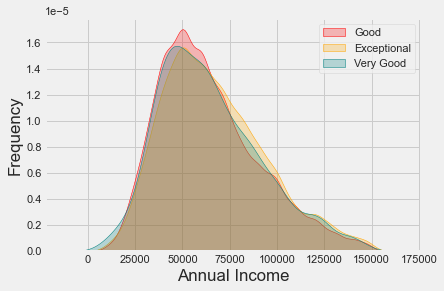

In [50]:
g = sns.kdeplot(train_new["Annual Income"][(train_new["Cred_Segment"] == "Good") & (train_new["Annual Income"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_new["Annual Income"][(train_new["Cred_Segment"] == "Exceptional") & (train_new["Annual Income"].notnull())], ax =g, color="Blue", shade= True)
g = sns.kdeplot(train_new["Annual Income"][(train_new["Cred_Segment"] == "Very Good") & (train_new["Annual Income"].notnull())], ax =g, color="Orange", shade= True)
g = sns.kdeplot(train_new["Annual Income"][(train_new["Cred_Segment"] == "Fair") & (train_new["Annual Income"].notnull())], ax =g, color="teal", shade= True)
g.set_xlabel("Annual Income")
g.set_ylabel("Frequency")
g = g.legend(["Good","Exceptional","Very Good","Fair"])

In [1]:
# alt.Chart(train_new).mark_bar().encode(
#     x='Cred_Segment',
#     y='count(Annual Income)',
#     color='Loan Status'
# ).properties(
#     width=500,
#     height=200,title="Loan Status as Per FICO Segment"
# )

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            Customers with Good & Very Good Credit Rating Segment is more likely to get the loan approved
        </p>
    </div>

<h1 style="font-family:cursive; font-size:10px;color:#008080;text-align:left;padding: 4px">2. Debt to Income Ratio</h1>

In [52]:
train_new['DTI']=(train_new['Monthly Debt']/(train_new['Annual Income']/12))*100

In [53]:
train_new['DTI'].isna().sum()

0

<h1 style="font-family:cursive; font-size:10px;color:#008080;text-align:left;padding: 4px">3. Debt to Limit ratio</h1>

In [54]:
train_new['DTL']=(train_new['Current Credit Balance']/(train_new['Maximum Open Credit']))*100

In [55]:
train_new['DTL'].isna().sum()

241

In [56]:
train_new['DTL']=train_new['DTL'].fillna(0)

<h1 style="font-family:cursive; font-size:10px;color:#008080;text-align:left;padding: 4px">4. Converting Categorical to Numeric Features</h1>

In [57]:
columns=train_new[['Purpose','Loan_Segment','Cred_Segment','Term','Years in current job']]
categorical_data=pd.get_dummies(columns,drop_first=True).astype(int)

In [58]:
train_new=train_new.drop(['Purpose','Loan_Segment','Cred_Segment','Term','Years in current job'],axis=1)

In [59]:
def func(x):
    if  x == 'Rent' :
        return 1
    elif  x == 'Own Home':
        return 2
    return 0
train_new['Home Ownership'] = train_new['Home Ownership'].apply(func)

In [60]:
def func(x):
    if  x == 'Loan Given' :
        return 1
    return 0
train_new['Loan Status'] = train_new['Loan Status'].apply(func)

In [61]:
display(np.any(np.isnan(X)))
display(np.all(np.isfinite(X)))

True

False

In [62]:
train_new=train_new.replace([np.inf, -np.inf], 0, inplace=False)

In [63]:
np.where(train_new.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

<h1 style="font-family:cursive; font-size:14px;color:#008080;text-align:left;padding: 4px">11. Feature Scaling</h1>

In [64]:
X=train_new.drop(['Loan Status','Home Ownership'],axis=1)
Y=train_new['Loan Status']

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(X.values)

In [66]:
scaled_features_df = pd.DataFrame(scaled_features,index=X.index, columns=X.columns)

In [67]:
train_new=train_new.drop(['Years of Credit History', 'Months since last delinquent',
       'Number of Credit Problems', 'Current Credit Balance', 'Tax Liens',
       'Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Maximum Open Credit', 'Credit Score', 'Number of Open Accounts', 'DTI',
       'DTL'],axis=1)

In [68]:
train_new.shape

(68225, 2)

In [69]:
train_new=pd.concat([train_new,scaled_features_df], axis=1).reindex(train_new.index)

In [70]:
train_new=pd.concat([train_new,categorical_data], axis=1).reindex(train_new.index)

In [71]:
#train_new=train_new.drop(train_new.columns[[0]],axis = 1)

<h1 style="font-family:cursive; font-size:14px;color:#008080;text-align:left;padding: 4px">12. Variance Inflation Factor</h1>

In [72]:
x=train_new.drop(['Loan Status'],axis=1)
y=train_new['Loan Status']

In [73]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = add_constant(x)
vif = pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

In [74]:
display(vif.sort_values(ascending = False).round(2).head(10).to_frame(name='VIF Score'))

,VIF Score
const,207.42
Cred_Segment_Very Good,12.77
Monthly Debt,12.08
Purpose_Debt Consolidation,11.65
Cred_Segment_Good,9.54
Annual Income,8.25
DTI,5.98
Purpose_other,4.87
Purpose_Home Improvements,4.36
Current Loan Amount,3.29


In [75]:
train_new=train_new.drop(['Cred_Segment_Very Good','Monthly Debt','Purpose_Debt Consolidation'],axis=1)

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.<br>
            1. Multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.<br>
            2. A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.
        </p>
    </div>

In [76]:
train_new['Loan Status'].value_counts()

1    53436
0    14789
Name: Loan Status, dtype: int64

In [78]:
#train_new.to_csv("Scale_new.csv")